<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/Lab6_CNN/Lab6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mokymo aibė: (60000, 28, 28)
Testavimo aibė: (10000, 28, 28)


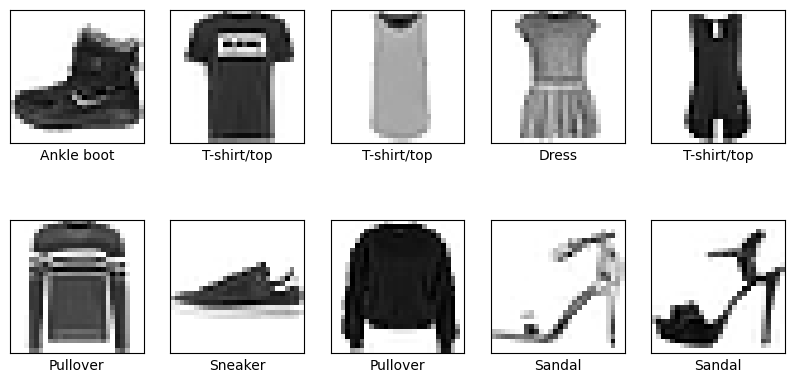

In [10]:
# --- 1. DATA EXPLORATION & PREPARATION ---

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

# Naudojame Fashion MNIST (drabužių nuotraukos 28x28)
# Tai atitinka 1-ąjį pasirinkimą iš namų darbų sąrašo.

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Mokymo aibė: {train_images.shape}")
print(f"Testavimo aibė: {test_images.shape}")

# Vizualizacija (Exploration)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Paruošimas (Normalization & Reshape)
# Normalizuojame į [0, 1] (daliname iš 255)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Keičiame formą į (28, 28, 1), nes CNN reikia 3D įėjimo (aukštis, plotis, kanalai)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)


--- Mokomas modelis: Simple ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8107 - loss: 0.5405 - val_accuracy: 0.8778 - val_loss: 0.3351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8988 - loss: 0.2835 - val_accuracy: 0.8930 - val_loss: 0.2985
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9137 - loss: 0.2363 - val_accuracy: 0.8959 - val_loss: 0.2827
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9245 - loss: 0.2033 - val_accuracy: 0.9109 - val_loss: 0.2545
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9365 - loss: 0.1716 - val_accuracy: 0.9069 - val_loss: 0.2665

--- Mokomas modelis: Deep ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.7513 - loss: 0.6904 - val_accuracy: 0.8579 - val_loss: 0.3861
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8811 - loss: 0.3264 - val_accuracy: 0.8857 - val_loss: 0.3223
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/st

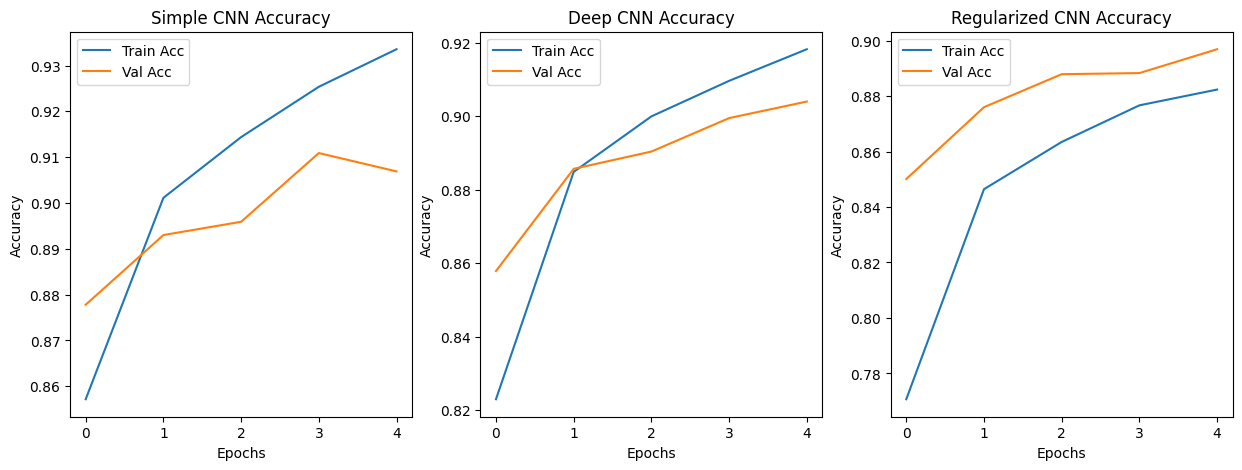

In [11]:
# --- 2. NEURAL NETWORK - 3 DIFFERENT STRUCTURES ---

def create_cnn(structure_type):
    model = models.Sequential()

    # Visada pradedame nuo Conv2D (Konvoliucija) ir MaxPooling2D (Mažinimas)

    if structure_type == "Simple":
        # 1. Paprastas CNN
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))

    elif structure_type == "Deep":
        # 2. Gilesnis CNN (daugiau sluoksnių geresniam požymių atpažinimui)
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))

    elif structure_type == "Regularized":
        # 3. Su Dropout (kad nepermokytų)
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25)) # Išmetame 25% neuronų

        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25))

        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.5))

    # Išėjimo sluoksnis (10 klasių -> Softmax)
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

structures = ["Simple", "Deep", "Regularized"]
history_dict = {}
models_dict = {}

plt.figure(figsize=(15, 5))

for i, struct in enumerate(structures):
    print(f"\n--- Mokomas modelis: {struct} ---")
    model = create_cnn(struct)

    # Mokome (naudojame mažiau epochų taupymui, bet CNN mokosi greitai)
    history = model.fit(train_images, train_labels, epochs=5,
                        validation_data=(test_images, test_labels), verbose=1)

    history_dict[struct] = history
    models_dict[struct] = model

    # Braižome kreives
    plt.subplot(1, 3, i+1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{struct} CNN Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()


--- Geriausio modelio (Deep) tikslumas: 0.9040 ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.79      0.84      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.80      0.89      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.68      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<Figure size 2500x2200 with 0 Axes>

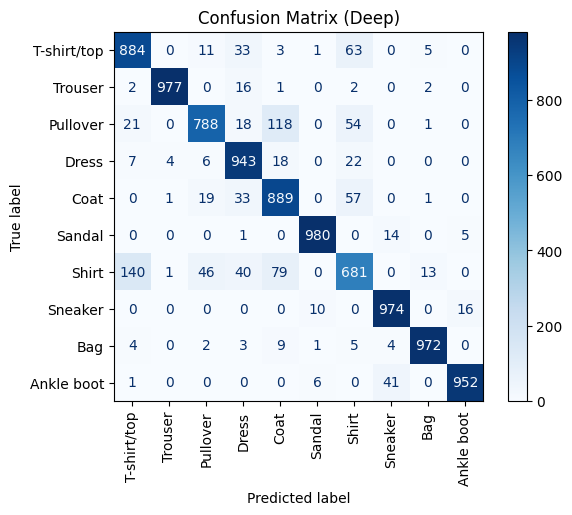

In [17]:
# --- 3. EVALUATION (Confusion Matrix & Report) ---
# Išsirenkame geriausią modelį (dažniausiai 'Deep' arba 'Regularized')

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model_name = "Deep"
model = models_dict[best_model_name]

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\n--- Geriausio modelio ({best_model_name}) tikslumas: {test_acc:.4f} ---")

# Prognozės
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names))

# Sukuriame matricą
cm = confusion_matrix(test_labels, y_pred)

# Braižome naudodami standartinį Matplotlib (be seaborn)
plt.figure(figsize=(25, 22))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix ({best_model_name})')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()